In [1]:
# 데이터셋 
# https://archive.ics.uci.edu/dataset/320/student+performance

from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv("C:/Users/gnssl/Downloads/student+performance/student/student-por.csv", sep=";")


In [3]:
df['sex'] = df['sex'].replace({'F': 1, 'M': 0})
df['schoolsup'] = df['schoolsup'].replace({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].replace({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].replace({'yes': 1, 'no': 0})
df['activities'] = df['activities'].replace({'yes': 1, 'no': 0})
df['higher'] = df['higher'].replace({'yes': 1, 'no': 0})
df['internet'] = df['internet'].replace({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].replace({'yes': 1, 'no': 0})
df['paid'] = df['paid'].replace({'yes': 1, 'no': 0})


df['Mjob'] = df['Mjob'].replace({'at_home': 0,'teacher': 1, 'health': 2, 'services' : 3, 'other' : 4,})
df['Fjob'] = df['Fjob'].replace({'at_home': 0,'teacher': 1, 'health': 2, 'services' : 3, 'other' : 4,})


df['Pstatus'] = df['Pstatus'].replace({'T': 1, 'A': 0})


In [4]:
df_encoded = pd.get_dummies(df)

In [5]:
df_encoded.corr()['G3'].sort_values(ascending=False)

G3                   1.000000
G2                   0.918548
G1                   0.826387
higher               0.332172
school_GP            0.284294
studytime            0.249789
Medu                 0.240151
Fedu                 0.211800
reason_reputation    0.170944
address_U            0.167637
internet             0.150025
sex                  0.129077
famrel               0.063361
activities           0.059791
famsup               0.059206
guardian_father      0.051030
reason_home          0.046537
famsize_LE3          0.045016
nursery              0.028752
Mjob                 0.016596
Pstatus             -0.000754
guardian_mother     -0.004415
Fjob                -0.033332
famsize_GT3         -0.045016
paid                -0.054898
schoolsup           -0.066405
guardian_other      -0.080729
goout               -0.087641
romantic            -0.090583
absences            -0.091379
reason_course       -0.098305
health              -0.098851
age                 -0.106505
freetime  

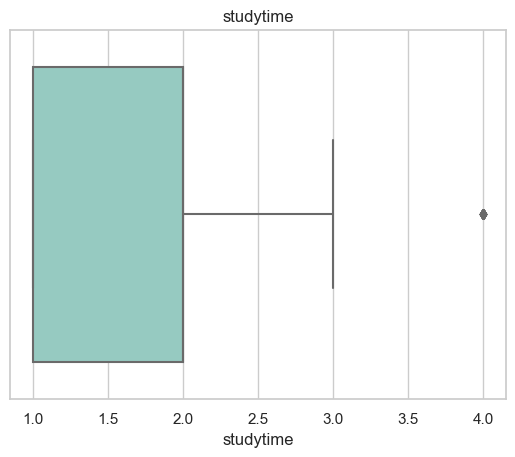

In [6]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="studytime", data=df_encoded, palette="Set3")
plt.title("studytime")
plt.show()

C:\Users\gnssl\anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


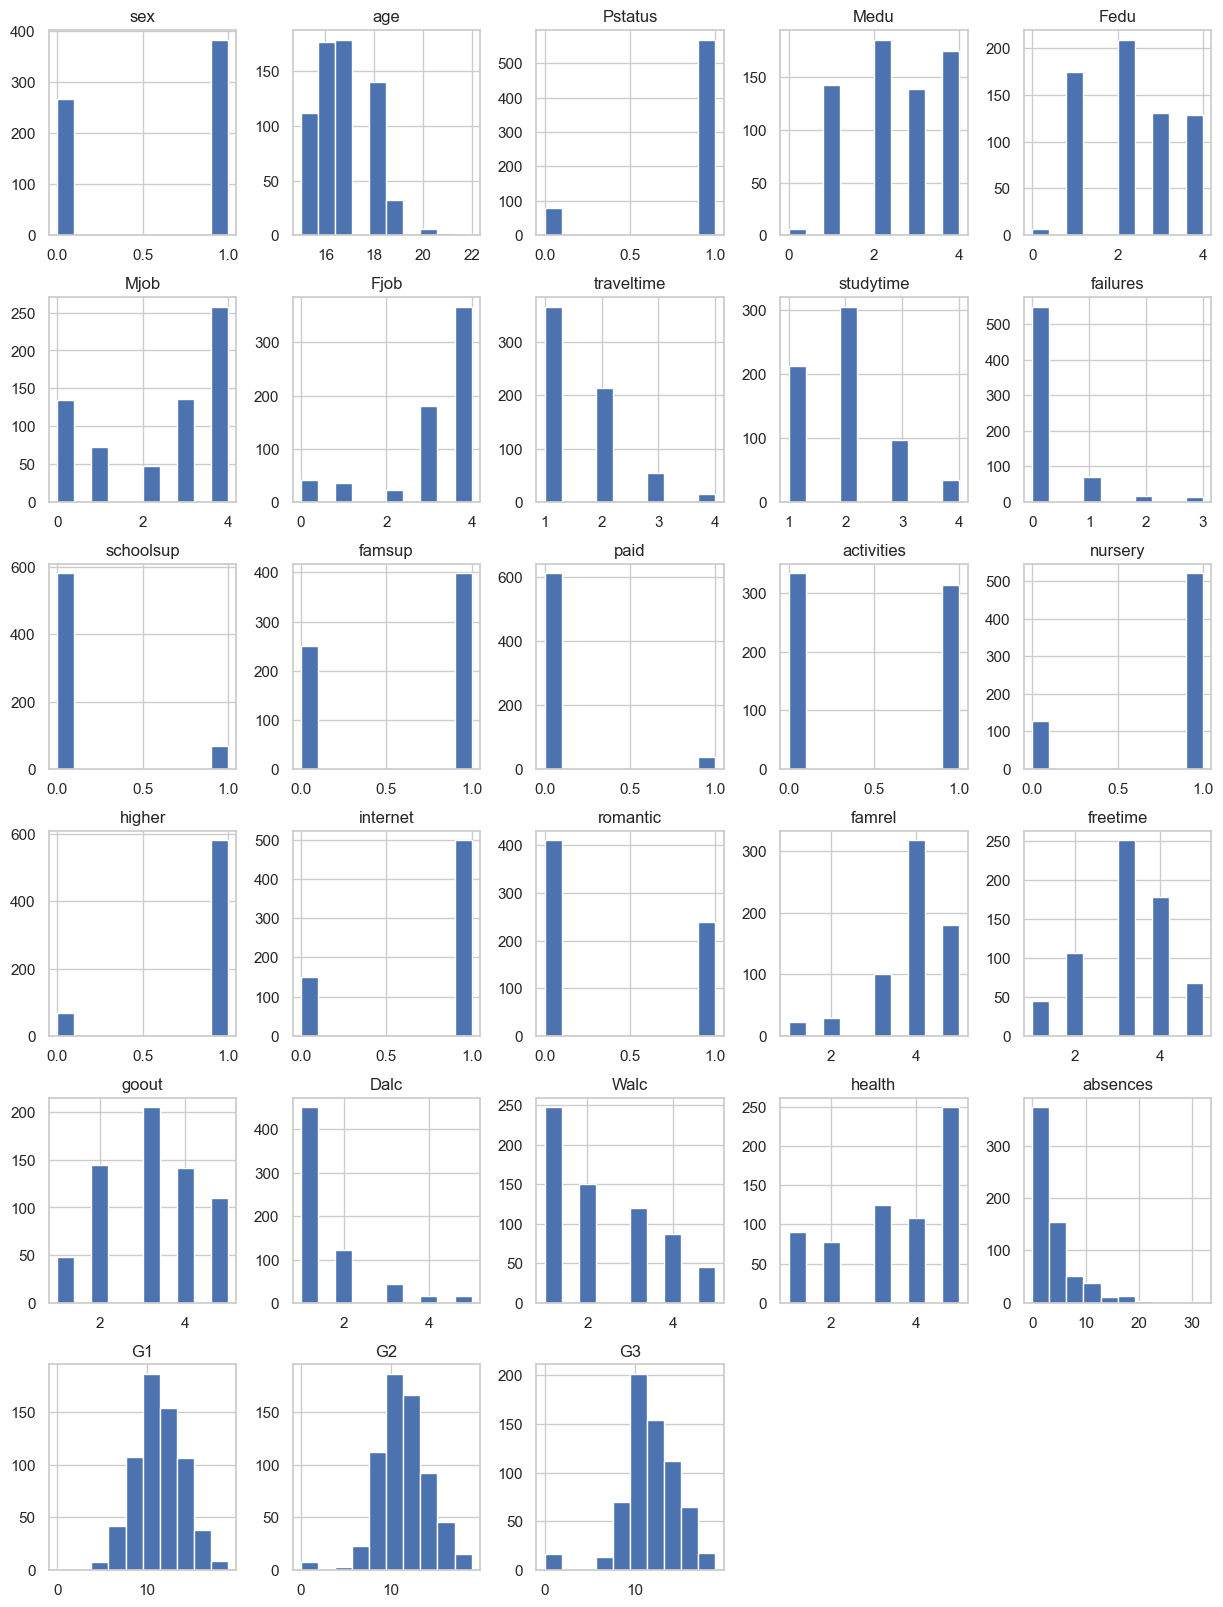

In [7]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [8]:
columns_to_drop = ['health','Dalc','Walc','Mjob', 'Fjob', 'freetime', 'traveltime','age', 'Pstatus','guardian_mother','guardian_other','guardian_father','goout','absences']
df_encoded = df_encoded.drop(columns=columns_to_drop)


In [9]:
df_encoded.columns

Index(['sex', 'Medu', 'Fedu', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
       'famrel', 'G1', 'G2', 'G3', 'school_GP', 'school_MS', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation'],
      dtype='object')

In [10]:
X = df_encoded.drop('G3',axis=1)
X.head()

,sex,Medu,Fedu,studytime,failures,schoolsup,famsup,paid,activities,nursery,...,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,reason_course,reason_home,reason_other,reason_reputation
0,1,4,4,2,0,1,0,0,0,1,...,1,0,0,1,1,0,1,0,0,0
1,1,1,1,2,0,0,1,0,0,0,...,1,0,0,1,1,0,1,0,0,0
2,1,1,1,2,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
3,1,4,2,3,0,0,1,0,1,1,...,1,0,0,1,1,0,0,1,0,0
4,1,3,3,2,0,0,1,0,0,1,...,1,0,0,1,1,0,0,1,0,0


In [11]:
y = df_encoded['G3']
y.value_counts()

11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: G3, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486, 26) (486,)
(163, 26) (163,)


In [13]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.3496932515337423
[[ 2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  4  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 12  9  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  8 15  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0 12  0  0  0  0  0]
 [ 0  0  0  0  0  0  5  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0 11  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  4  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  2  0  0]]


In [14]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.27607361963190186
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  2  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  3  0  1  0  0  0  0  0  1]
 [ 1  0  0  3  3  5  7  1  1  1  0  0  0  0  0]
 [ 1  0  0  0  0  7 11  1  0  1  1  0  0  1  0]
 [ 0  0  0  1  0  1  8  3  4  4  2  0  1  1  0]
 [ 0  0  0  0  0  1  3  4  9  5  3  0  0  0  0]
 [ 0  0  0  0  0  0  1  3  5  3  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  3  5  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  2  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  2  4  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


C:\Users\gnssl\anaconda3\envs\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [15]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.3496932515337423
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  3  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  3  0  1  1  0  0  0  0]
 [ 1  0  0  2  3  4  8  2  1  1  0  0  0  0]
 [ 0  0  0  0  0  4 14  4  0  1  0  0  0  0]
 [ 0  0  0  1  0  0 11  3  4  4  1  0  0  1]
 [ 0  0  0  0  0  0  3  3 14  3  2  0  0  0]
 [ 0  0  0  0  0  0  0  1  7  4  3  0  2  0]
 [ 0  0  0  0  0  0  0  0  3  2  5  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  3  4  0]
 [ 0  0  0  0  0  0  0  0  0  2  0  4  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  1]]


C:\Users\gnssl\anaconda3\envs\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [16]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.3496932515337423
[[ 2  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  1  1  2  0  1  0  0  0  0  0  0]
 [ 0  0  1  4  3  5  6  3  0  0  0  0  0  0  0]
 [ 1  0  0  0  1  9 11  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  8  8  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  8 10  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  5  7  3  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  1  3  4  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  5  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  2  4  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.3496932515337423
[[ 2  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  2  1  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  2  2  1  0  0  0  0  0  0]
 [ 0  0  0  3  1  9  7  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  8 14  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  9  1  9  3  1  0  0  0]
 [ 0  0  0  0  0  1  1  5 13  5  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  9  3  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  2  4  1  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  4  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  1  4  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  1]]
